Initial Dataset:
   Age  Income  Student  Credit_Rate  Default
0   58   74131        1            1        1
1   48   90263        1            0        0
2   34   46023        1            0        1
3   27   71090        1            0        1
4   40   97221        0            0        0
5   58   94820        0            0        1
6   38   30769        1            1        0
7   42   89735        1            1        1
8   30   92955        1            1        0
9   30   94925        0            1        1

Initial Weights: [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]


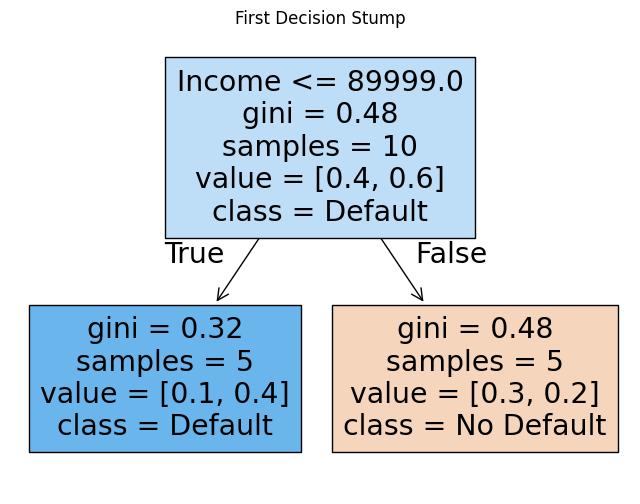


Weighted Error: 0.30000000000000004

Model Weight (Alpha): 0.4236489301936017
[0.06546537 0.06546537 0.06546537 0.06546537 0.06546537 0.15275252
 0.15275252 0.06546537 0.06546537 0.15275252]

Updated Weights: [0.07142857 0.07142857 0.07142857 0.07142857 0.07142857 0.16666667
 0.16666667 0.07142857 0.07142857 0.16666667]

Resampled Dataset:
   Age  Income  Student  Credit_Rate  Default
0   58   94820        0            0        1
1   30   94925        0            1        1
2   38   30769        1            1        0
3   58   94820        0            0        1
4   58   74131        1            1        1
5   30   94925        0            1        1
6   38   30769        1            1        0
7   58   94820        0            0        1
8   58   74131        1            1        1
9   27   71090        1            0        1


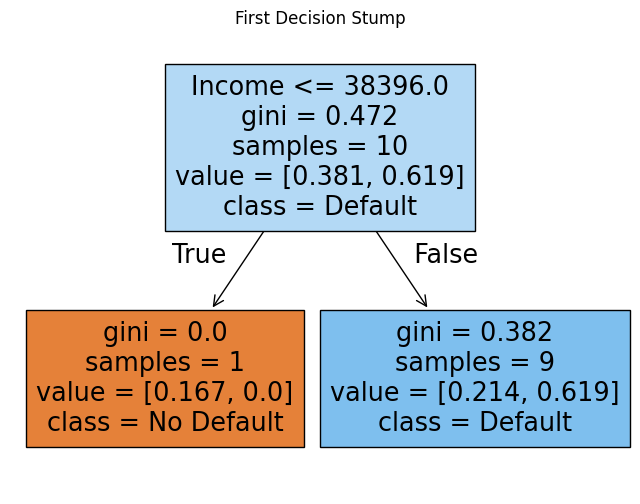

[0.03730235 0.1367753  0.03730235 0.03730235 0.1367753  0.08703883
 0.08703883 0.03730235 0.1367753  0.08703883]

Iteration 1 - Weighted Error: 0.2142857142857143, Alpha: 0.6496414920651304
Updated Weights: [0.04545455 0.16666667 0.04545455 0.04545455 0.16666667 0.10606061
 0.10606061 0.04545455 0.16666667 0.10606061]


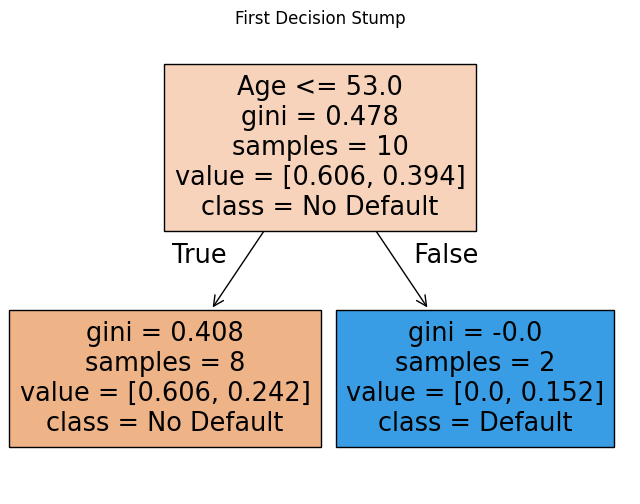

[0.02571297 0.0942809  0.08035304 0.08035304 0.0942809  0.05999694
 0.05999694 0.08035304 0.0942809  0.18749043]

Iteration 2 - Weighted Error: 0.2424242424242425, Alpha: 0.5697171415941823
Updated Weights: [0.03    0.11    0.09375 0.09375 0.11    0.07    0.07    0.09375 0.11
 0.21875]


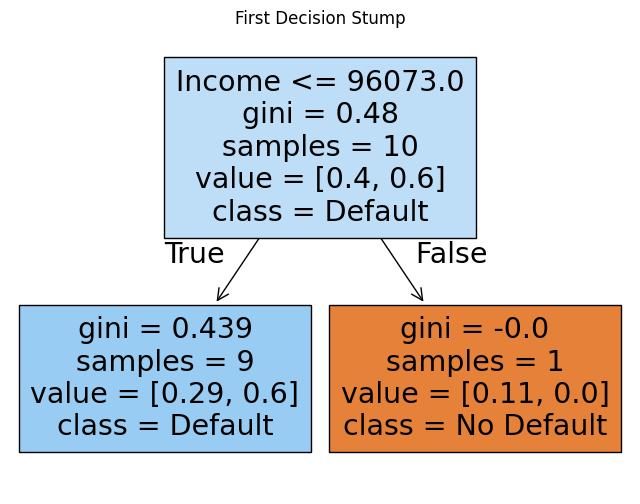

[0.01917304 0.17211664 0.05991576 0.05991576 0.07030116 0.0447371
 0.10952877 0.05991576 0.17211664 0.13980345]

Iteration 3 - Weighted Error: 0.2900000000000001, Alpha: 0.4476920235274205
Updated Weights: [0.02112676 0.18965517 0.06602113 0.06602113 0.07746479 0.04929577
 0.12068966 0.06602113 0.18965517 0.1540493 ]


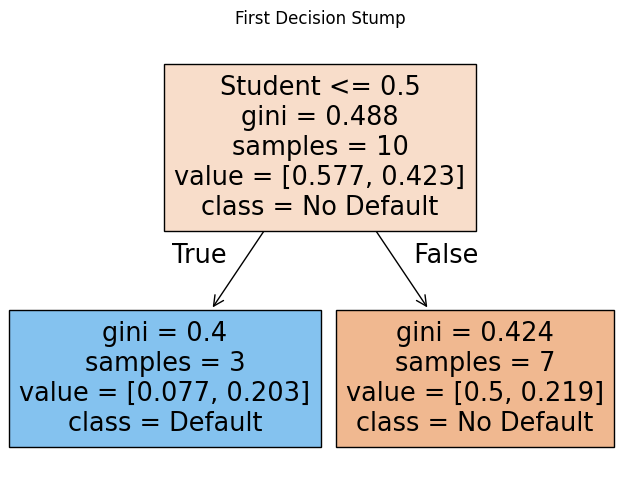

[0.03253055 0.12317037 0.10165796 0.10165796 0.11927867 0.03201483
 0.07838115 0.10165796 0.12317037 0.10004636]

Iteration 4 - Weighted Error: 0.29665492957746487, Alpha: 0.4316390077069563
Updated Weights: [0.03560831 0.1348237  0.11127596 0.11127596 0.1305638  0.0350438
 0.0857969  0.11127596 0.1348237  0.10951189]


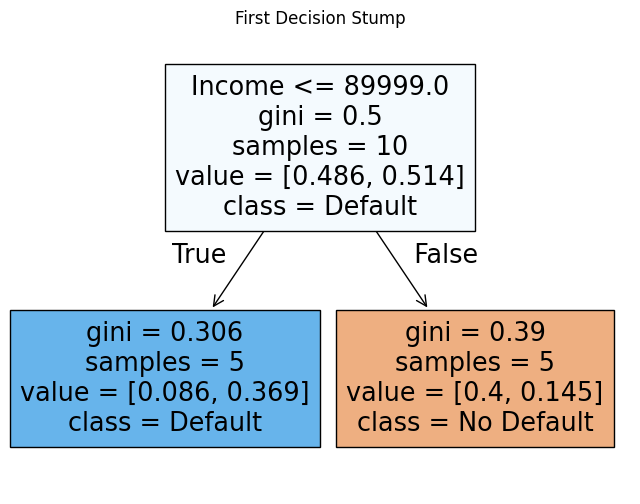

[0.01948059 0.07375932 0.06087683 0.06087683 0.07142881 0.06405612
 0.15682704 0.06087683 0.07375932 0.20017536]

Iteration 5 - Weighted Error: 0.23035259591731044, Alpha: 0.6031606662149145
Updated Weights: [0.02313287 0.08758797 0.07229022 0.07229022 0.08482053 0.07606557
 0.18622951 0.07229022 0.08758797 0.23770492]

Final Predictions: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

Final Model Accuracy: 0.6


In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

def gini_impurity(y):
    """Calculate Gini Impurity"""
    probs = np.bincount(y) / len(y)
    return 1 - np.sum(probs ** 2)

# Step 1: Create a small dataset
np.random.seed(42)
df = pd.DataFrame({
    'Age': np.random.randint(20, 60, 10),
    'Income': np.random.randint(30000, 100000, 10),
    'Student': np.random.choice([0, 1], 10),  # 0: No, 1: Yes
    'Credit_Rate': np.random.choice([0, 1], 10),  # 0: below avearge, 1: Above average
    'Default': np.random.choice([0, 1], 10)  # Target variable
})
print("Initial Dataset:")
print(df)

# Step 2: Initialize weights equally
n = len(df)
weights = np.ones(n) / n
print("\nInitial Weights:", weights)

# Step 3: Train the first decision stump
stump = DecisionTreeClassifier(max_depth=1)
stump.fit(df.drop(columns=['Default']), df['Default'], sample_weight=weights)
preds = stump.predict(df.drop(columns=['Default']))

plt.figure(figsize=(8, 6))
plot_tree(stump, feature_names=df.drop(columns=['Default']).columns, class_names=["No Default", "Default"], filled=True)
plt.title("First Decision Stump")
plt.show()

# Step 4: Compute weighted error
epsilon = np.sum(weights * (preds != df['Default']))
print("\nWeighted Error:", epsilon)

# Step 5: Compute model weight (alpha)
alpha = 0.5 * np.log((1 - epsilon) / max(epsilon, 1e-10))  # Avoid division by zero
print("\nModel Weight (Alpha):", alpha)

# Step 6: Update sample weights
# weights *= np.exp(-alpha * df['Default'] * preds + alpha * (1 - df['Default'] * preds))
# weights /= np.sum(weights)
# print("\nUpdated Weights:", weights)

weights = np.where(
        preds != df['Default'],
        weights * np.exp(alpha),
        weights * np.exp(-alpha)
    )
print(weights)
weights /= np.sum(weights)
print("\nUpdated Weights:", weights)

# Step 7: Create a new weighted dataset by resampling
indices = np.random.choice(range(n), size=n, p=weights)
df_resampled = df.iloc[indices].reset_index(drop=True)
print("\nResampled Dataset:")
print(df_resampled)

# Step 8: Repeat the process for additional stumps
stumps = []
alphas = []
for i in range(5):  # Run for 5 boosting rounds
    stump = DecisionTreeClassifier(max_depth=1)
    stump.fit(df.drop(columns=['Default']), df['Default'], sample_weight=weights)
    preds = stump.predict(df.drop(columns=['Default']))

    plt.figure(figsize=(8, 6))
    plot_tree(stump, feature_names=df.drop(columns=['Default']).columns, class_names=["No Default", "Default"], filled=True)
    plt.title("First Decision Stump")
    plt.show()
    
    epsilon = np.sum(weights * (preds != df['Default']))
    alpha = 0.5 * np.log((1 - epsilon) / max(epsilon, 1e-10))
    
    # one way to recalculate the weights
    # weights *= np.exp(-alpha * df['Default'] * preds + alpha * (1 - df['Default'] * preds))
    # weights /= np.sum(weights)

    # decided to use this way
    weights = np.where(
        preds != df['Default'],
        weights * np.exp(alpha),
        weights * np.exp(-alpha)
    )
    print(weights)
    weights /= np.sum(weights)
    
    stumps.append(stump)
    alphas.append(alpha)
    
    print(f"\nIteration {i+1} - Weighted Error: {epsilon}, Alpha: {alpha}")
    print("Updated Weights:", weights)

# Step 9: Final Prediction Formula
final_preds = np.zeros(n)
for stump, alpha in zip(stumps, alphas):
    final_preds += alpha * stump.predict(df.drop(columns=['Default']))
final_preds = np.sign(final_preds)  # Convert to binary classification
print("\nFinal Predictions:", final_preds)

# Accuracy of the AdaBoost classifier
accuracy = accuracy_score(df['Default'], final_preds)
print("\nFinal Model Accuracy:", accuracy)
